
## Importing Necessary Libraries

In [155]:
import numpy as np
import random
import cv2
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras import layers
from keras import models
from keras.metrics import Precision, Recall
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

## Loading MNIST Dataset

In [156]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Original Shapes:")
print("Training Images Shape:", train_images.shape)
print("Training Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)

Original Shapes:
Training Images Shape: (60000, 28, 28)
Training Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


##  Split the test data into validation and test sets

In [157]:
split_index = len(test_images) // 2

validation_images = test_images[:split_index]
validation_labels = test_labels[:split_index]
test_images = test_images[split_index:]
test_labels = test_labels[split_index:]

print("\nSplit Shapes:")
print("Training Images Shape:", train_images.shape)
print("Training Labels Shape:", train_labels.shape)
print("Validation Images Shape:", validation_images.shape)
print("Validation Labels Shape:", validation_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)


Split Shapes:
Training Images Shape: (60000, 28, 28)
Training Labels Shape: (60000,)
Validation Images Shape: (5000, 28, 28)
Validation Labels Shape: (5000,)
Test Images Shape: (5000, 28, 28)
Test Labels Shape: (5000,)


## Displaying an Image with Label

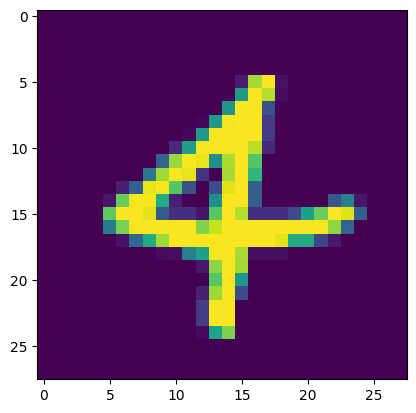

4


In [158]:
plt.imshow(train_images[150,:,:])
plt.show()
print(train_labels[150])

## Displaying Random Images with Labels

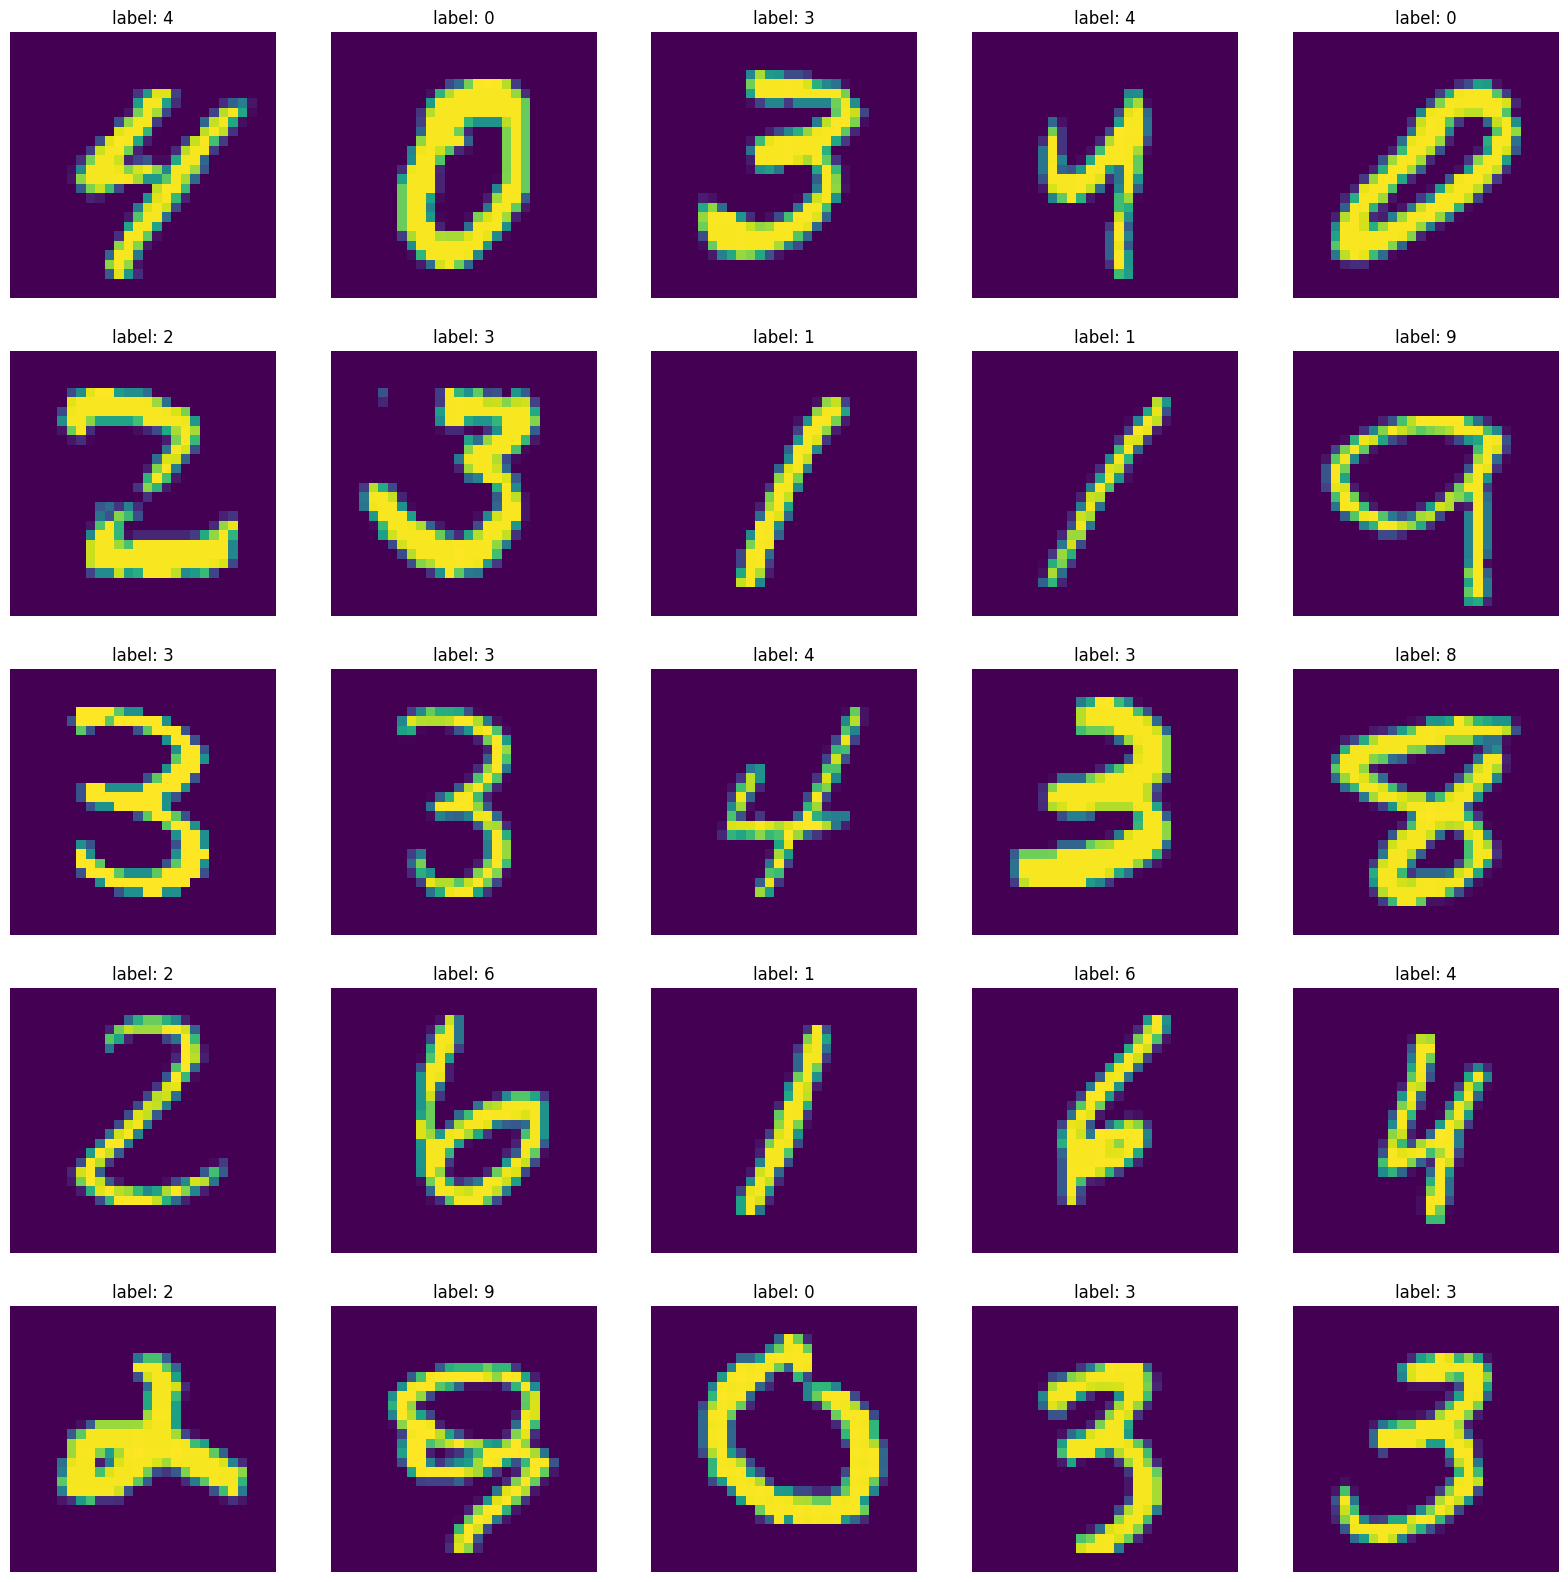

In [159]:
plt.figure(figsize=(20, 20))
for i in range(25):
    random_idx = random.randint(0, len(train_images))
    image = train_images[random_idx]
    plt.subplot(5, 5, i+1)
    plt.imshow(image.squeeze())
    plt.title("label: " + str(train_labels[random_idx]))
    plt.axis("off")

## Preprocessing Data

In [160]:
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32')/255

validation_images = validation_images.reshape((split_index, 28, 28, 1))
validation_images = validation_images.astype('float32') / 255

test_images = test_images.reshape((split_index,28,28,1))
test_images = test_images.astype('float32')/255



## One-hot encoding Training-Testing Labels

In [161]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
validation_labels = to_categorical(validation_labels)
test_labels = to_categorical(test_labels)

## Shapes of Data after One-hot encoding

In [162]:
print("Training Images Shape:", train_images.shape)
print("Training Labels Shape:", train_labels.shape)
print("Validation Images Shape:", validation_images.shape)
print("Validation Labels Shape:", validation_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)

Training Images Shape: (60000, 28, 28, 1)
Training Labels Shape: (60000, 10)
Validation Images Shape: (5000, 28, 28, 1)
Validation Labels Shape: (5000, 10)
Test Images Shape: (5000, 28, 28, 1)
Test Labels Shape: (5000, 10)


## Image with encoded Label

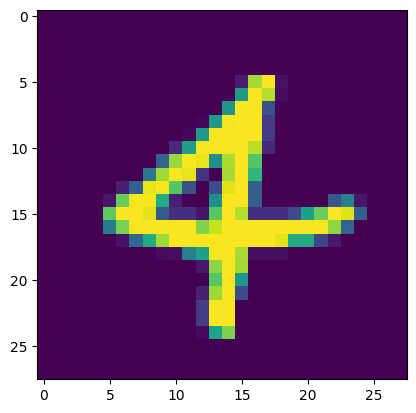

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [163]:
plt.imshow(train_images[150,:,:])
plt.show()
print(train_labels[150])

##  Random Images with encoded Labels

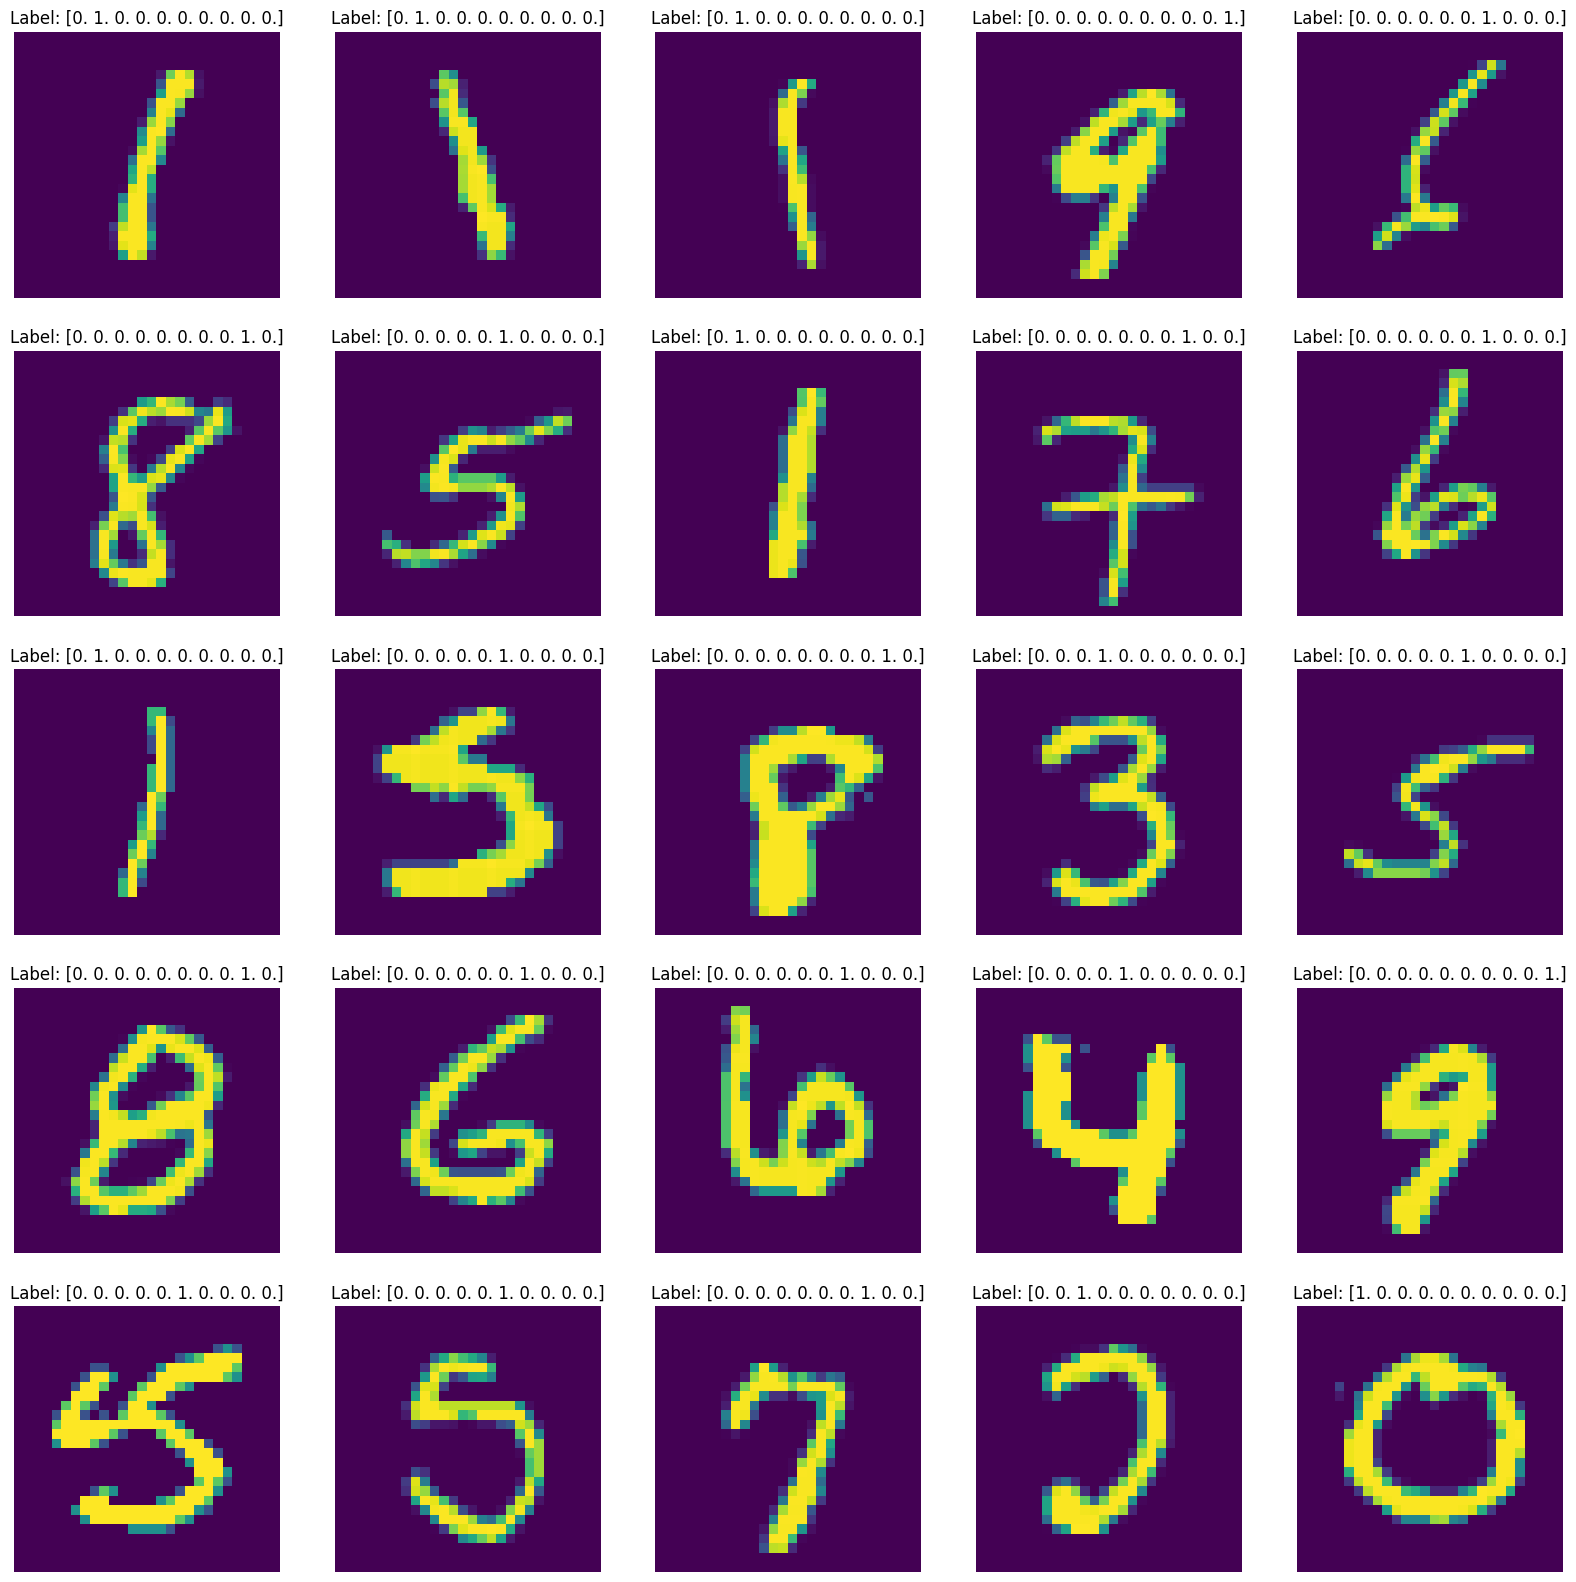

In [164]:
plt.figure(figsize=(20, 20))
for i in range(25):
    random_idx = random.randint(0, len(train_images) - 1)
    image = train_images[random_idx]
    label = train_labels[random_idx]
    plt.subplot(5, 5, i + 1)
    plt.imshow(image)
    plt.title("Label: " + str(label))
    plt.axis("off")

plt.show()


## Convolutional Neural Network (CNN) Model

In [165]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10, activation= 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 576)              

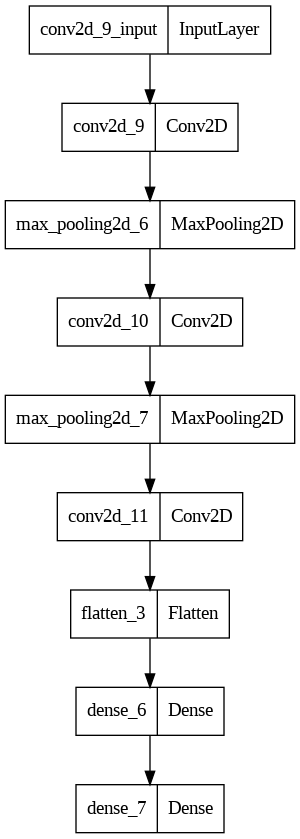

In [166]:
from keras.utils import plot_model
plot_model(model)

## Compiling the Model

In [167]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])


## Model Training

In [168]:
train_model = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(validation_images, validation_labels))

Epoch 1/5
938/938 [==============================] - 55s 57ms/step - loss: 0.1795 - accuracy: 0.9434 - precision_1: 0.9660 - recall_1: 0.9266 - val_loss: 0.0710 - val_accuracy: 0.9774 - val_precision_1: 0.9815 - val_recall_1: 0.9746
Epoch 2/5
938/938 [==============================] - 51s 54ms/step - loss: 0.0496 - accuracy: 0.9839 - precision_1: 0.9856 - recall_1: 0.9826 - val_loss: 0.0564 - val_accuracy: 0.9814 - val_precision_1: 0.9826 - val_recall_1: 0.9802
Epoch 3/5
938/938 [==============================] - 52s 56ms/step - loss: 0.0338 - accuracy: 0.9896 - precision_1: 0.9904 - recall_1: 0.9888 - val_loss: 0.0363 - val_accuracy: 0.9876 - val_precision_1: 0.9884 - val_recall_1: 0.9862
Epoch 4/5
938/938 [==============================] - 54s 58ms/step - loss: 0.0252 - accuracy: 0.9926 - precision_1: 0.9932 - recall_1: 0.9922 - val_loss: 0.0373 - val_accuracy: 0.9886 - val_precision_1: 0.9892 - val_recall_1: 0.9876
Epoch 5/5
938/938 [==============================] - 61s 65ms/step -

##   Model Performance on Test Dataset

In [169]:
predictions = model.predict(test_images)
f1 = f1_score(np.argmax(test_labels, axis=1), np.argmax(predictions, axis=1), average='weighted')
print("F1 Score:", f1)
model.evaluate(test_images, test_labels)[1]

157/157 [==============================] - 2s 13ms/step
F1 Score: 0.9966005120629657
157/157 [==============================] - 2s 13ms/step - loss: 0.0133 - accuracy: 0.9966 - precision_1: 0.9970 - recall_1: 0.9966


0.9965999722480774

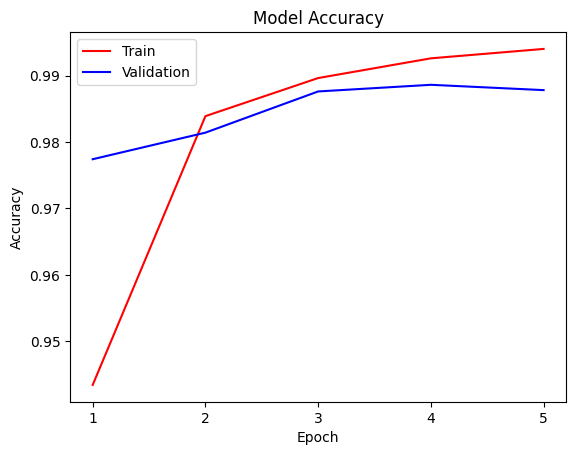

In [170]:
epochs = range(1, len(train_model.history['accuracy']) + 1)
plt.plot(epochs, train_model.history['accuracy'], color='red', label='Train')
plt.plot(epochs, train_model.history['val_accuracy'], color='blue', label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(epochs) + 1))
plt.legend()
plt.show()

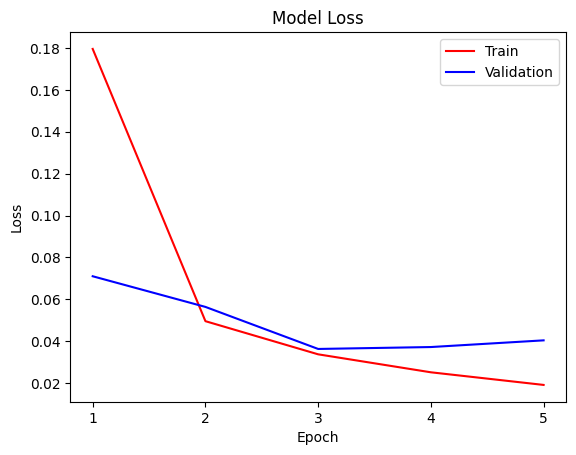

In [171]:
epochs = range(1, len(train_model.history['loss']) + 1)
plt.plot(epochs, train_model.history['loss'], color='red', label='Train')
plt.plot(epochs, train_model.history['val_loss'], color='blue', label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1, len(epochs) + 1))
plt.legend()
plt.show()

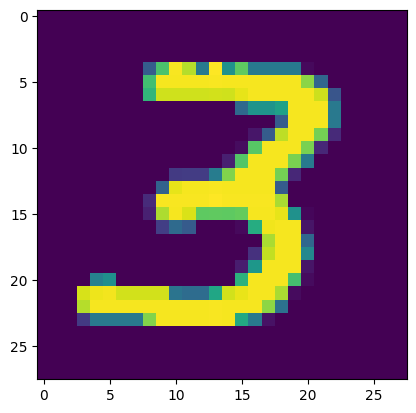

Shape of inpute image (1, 28, 28, 1)
1/1 [==============================] - 0s 24ms/step
Predicted Class: 3


In [172]:
plt.imshow(test_images[150,:,:])
plt.show()
single_test_image = np.expand_dims(test_images[150,:,:], axis=0)
print("Shape of inpute image",single_test_image.shape)
predictions = model.predict(single_test_image)
predicted_class = np.argmax(predictions)
print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 29ms/step


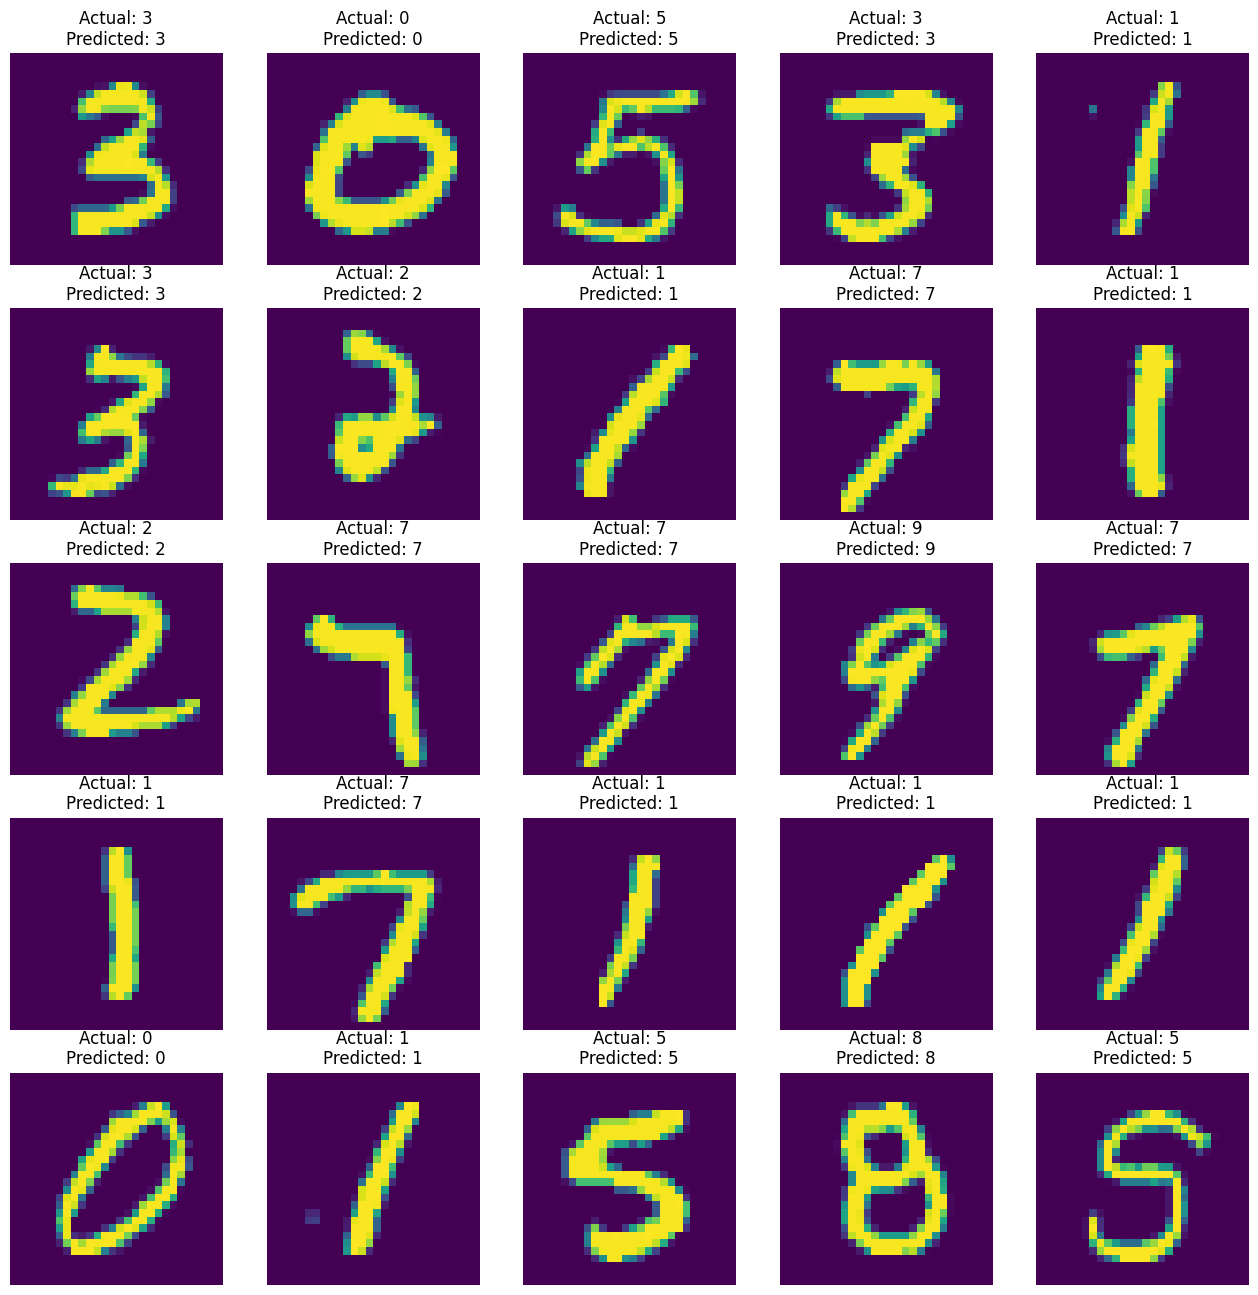

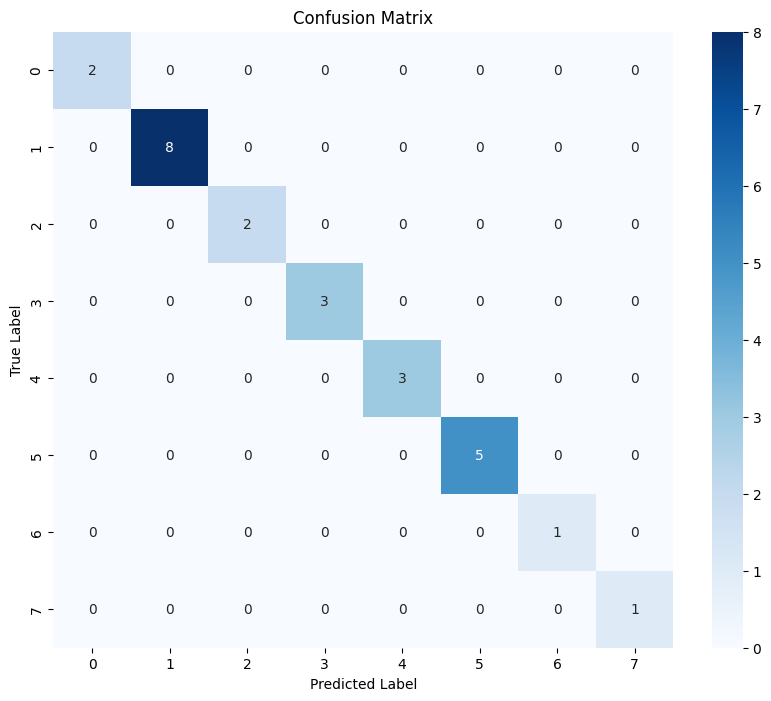

In [173]:
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols

plt.figure(figsize=(16, 16))

all_actual_labels = []
all_predicted_labels = []

for i in range(num_images):
    random_idx = random.randint(0, len(test_images) - 1)
    random_test_image = test_images[random_idx]

    row_idx = i // num_cols
    col_idx = i % num_cols

    # Display the randomly selected test image in the appropriate subplot
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(random_test_image.squeeze())

    # Add batch dimension to the single test image
    single_test_image = np.expand_dims(random_test_image, axis=0)

    # Predict using the model
    predictions = model.predict(single_test_image)
    predicted_class = np.argmax(predictions)

    actual_label = np.argmax(test_labels[random_idx])
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_class}")

    plt.axis("off")

    all_actual_labels.append(actual_label)
    all_predicted_labels.append(predicted_class)

plt.show()


conf_matrix = confusion_matrix(all_actual_labels, all_predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


157/157 [==============================] - 2s 12ms/step


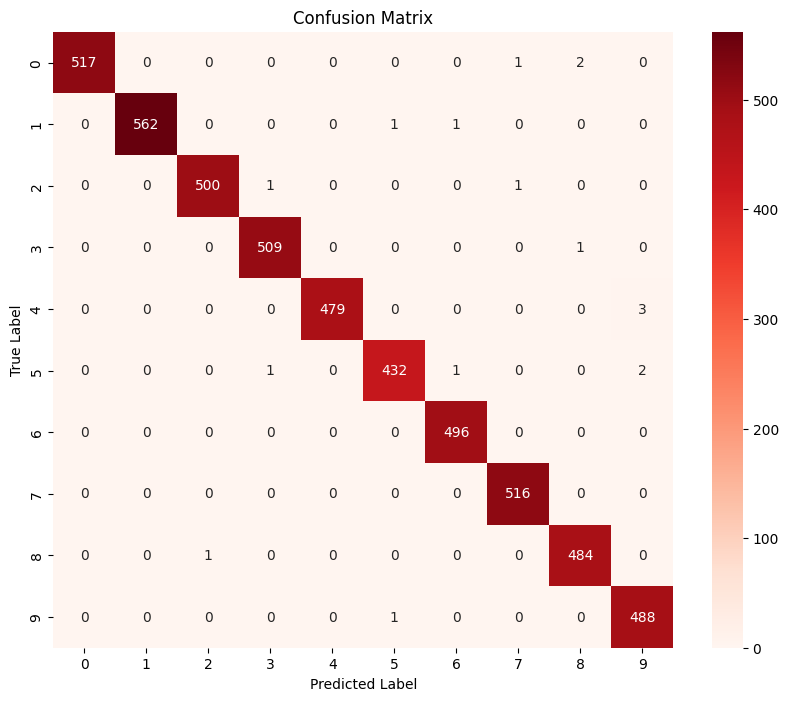

In [174]:
# Predict labels
all_predictions = model.predict(test_images)
predicted_labels = np.argmax(all_predictions, axis=1)

#  true labels
true_labels = np.argmax(test_labels, axis=1)

# confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()